In [708]:
import numpy as np
import matplotlib.pyplot as plt

In [709]:
class XOR:
    def reset_values(self):
        self.X = np.float64([
        [0, 0],
        [1, 0],
        [0, 1],
        [1, 1]
        ])

        self.y = np.float64([
            [0],
            [1],
            [1],
            [0],
        ])

        self.W1 = np.float64([
            [0.2, 0.9],
            [-0.9, 0.8]
        ])

        self.b1 = np.float64([
            [-0.3, 0.2]
        ])

        self.W2 = np.float64([
            [-0.2, -0.9],
        ])

        self.b2 = np.float64([
            [0.7]
        ])

XOR_podaci = XOR()
XOR_podaci.reset_values()

In [710]:
# za pretvaranja txt filea u format za obradu
def file_into_array(file):
    line_into_list = [i.split(' ') for i in file.read().splitlines()]
    return [
    [float(x) for x in sublist if x]
    for sublist in line_into_list
    ]

In [711]:
# učitavanje text file-ova u varijable
with open('podaci/Z.txt', 'r') as file:
    Z = file_into_array(file)

with open('podaci/D.txt', 'r') as file:
    D = file_into_array(file)

with open('podaci/V.txt', 'r') as file:
    V = file_into_array(file)

with open('podaci/W.txt', 'r') as file:
    W = file_into_array(file)

In [712]:
print(f'Z (prva 3): {Z[:3]}')
print(f'D (prva 3): {D[:3]}')
print(f'V (prvi): {V[:1]}')
print(f'W: {W}')

Z (prva 3): [[1.0, 0.0], [1.0, 0.16667], [1.0, 0.30556]]
D (prva 3): [[0.16667], [0.30556], [0.4213]]
V (prvi): [[-0.017115, -0.0086488, 0.011093]]
W: [[-0.010689, -0.008095, -0.029443, 0.014384, 0.0032519, -0.0075493]]


In [713]:
class P1_ident:
    def reset_values(self):
        self.X = np.array(Z)
        self.y = np.array(D)
        self.W1 = np.array([i[:2] for i in V])
        self.b1 = np.array([i[2:] for i in V]).T
        self.W2 = np.array([i[:-1] for i in W])
        self.b2 = np.expand_dims(np.array([i[-1] for i in W]), axis=0)
P1_ident_podaci=P1_ident()
P1_ident_podaci.reset_values()

In [714]:
def aktivacijska_funkcija1(z, derivacija=False):
    if derivacija:
        return 0.5*(1-np.square(z))
    else:
        return 2/(1+np.exp(-z)) - 1
    
def aktivacijska_funkcija2(z, derivacija=False):
    if derivacija:
        return z*(1-z)
    else:
        return 1/(1+np.exp(-z))

In [715]:
def forward(z, podaci, aktivacijska_funkcija):
    h = z @ podaci.W1.T + podaci.b1
    H = aktivacijska_funkcija(h) 
    O = H @ podaci.W2.T + podaci.b2

    return O

In [716]:
def train(podaci, iteracije, learning_rate, momentum, aktivacijska_funkcija, ispis_zadnjih_parametara=False):
    loss_history = []

    X_ = podaci.X
    y_ = podaci.y

    deltaW1, deltaW2, deltab1, deltab2 = 0, 0, 0, 0

    for _ in range(iteracije):
        for j in range(len(X_)):
            X = np.expand_dims(X_[j], axis=0)
            y = np.expand_dims(y_[j], axis=0)
            
            # forward
            h = X @ podaci.W1.T + podaci.b1
            H = aktivacijska_funkcija(h) 
            O = H @ podaci.W2.T + podaci.b2 
        
            # backprop
            error = -(y - O)
            dW2 = error * H
            db2 = error
            dH = error * podaci.W2
            dh = aktivacijska_funkcija(H, derivacija=True)
            dW1 = (dH * dh).T @ X
            db1 = dH * dh


            # optimizacija
            deltaW2 = -learning_rate * dW2 + momentum * deltaW2
            deltaW1 = -learning_rate * dW1 + momentum * deltaW1
            deltab2 = -learning_rate * db2 + momentum * deltab2
            deltab1 = -learning_rate * db1 + momentum * deltab1

            podaci.W2 = podaci.W2 + deltaW2
            podaci.W1 = podaci.W1 + deltaW1
            podaci.b2 = podaci.b2 + deltab2
            podaci.b1 = podaci.b1 + deltab1

        # loss
        y_pred = forward(z=X_, podaci=podaci, aktivacijska_funkcija=aktivacijska_funkcija)

        MS = np.mean(np.square(y_pred - y_))
        RMS = np.sqrt(MS)
        NRMS = RMS / np.sqrt(np.mean(np.square(y_ - np.mean(y_))))
        
        loss = NRMS
        loss_history.append(loss)

    print(f"Konačan gubitak (NRMS): {loss}")

    if ispis_zadnjih_parametara:
            y_pred = forward(z=X_, podaci=podaci, aktivacijska_funkcija=aktivacijska_funkcija)
            y_pred = y_pred
            print(f'Izlazne vrijednosti: {y_pred}')
            print(f'W1: {podaci.W1}')
            print(f'b1: {podaci.b1}')
            print(f'W2: {podaci.W2}')
            print(f'b2: {podaci.b2}')
        
    plt.plot(range(iteracije), loss_history)
    plt.xlabel("Iteracija")
    plt.ylabel("NRMS")
    plt.title("Greška modela kroz iteracije")
    plt.show()

Konačan gubitak (NRMS): 0.0014819265917265835
Izlazne vrijednosti: [[9.96390867e-04]
 [9.99366890e-01]
 [9.99161391e-01]
 [3.14989443e-04]]
W1: [[-1.67270923  1.81930453]
 [-2.30756502  2.5369915 ]]
b1: [[-0.97232224  1.45922756]]
W2: [[ 1.86851656 -1.73574611]]
b2: [[1.9250773]]


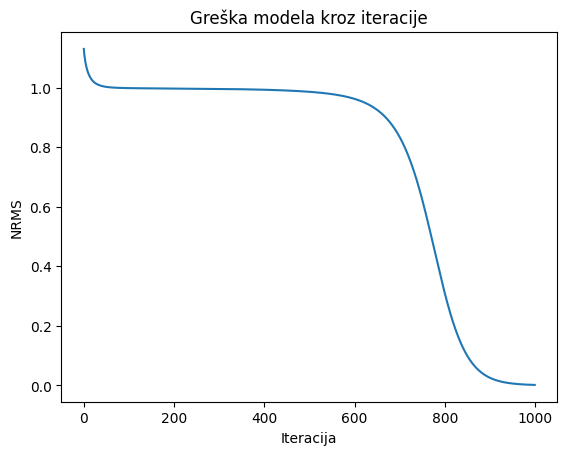

In [717]:
train(
    podaci=XOR_podaci,
    aktivacijska_funkcija=aktivacijska_funkcija1,
    iteracije=1000,
    learning_rate=0.1,
    momentum=0.0,
    ispis_zadnjih_parametara=True
)

Konačan gubitak (NRMS): 0.9906648643939981


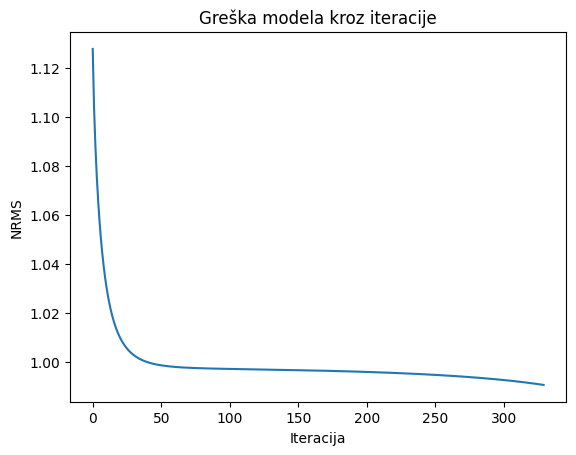

In [718]:
XOR_podaci.reset_values()
train(
    podaci=XOR_podaci,
    aktivacijska_funkcija=aktivacijska_funkcija1,
    iteracije=330,
    learning_rate=0.1,
    momentum=0.3,
)

Konačan gubitak (NRMS): 0.9931589294921469


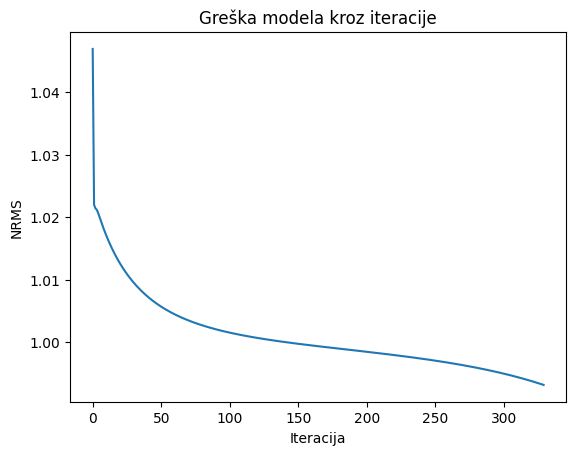

In [719]:
XOR_podaci.reset_values()
train(
    podaci=XOR_podaci,
    aktivacijska_funkcija=aktivacijska_funkcija2,
    iteracije=330,
    learning_rate=0.1,
    momentum=0.3,
)

Konačan gubitak (NRMS): 0.027333761803980484


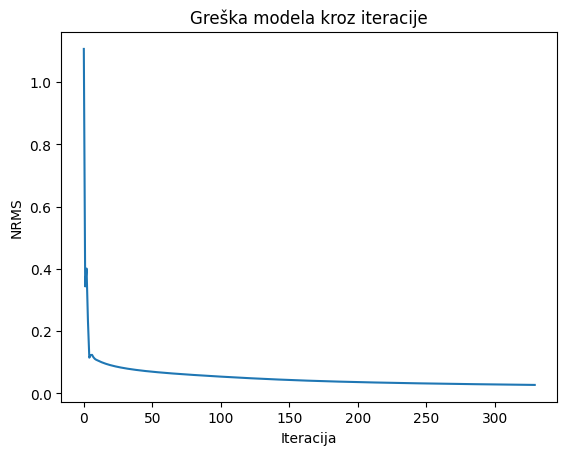

In [720]:
train(
    podaci=P1_ident_podaci,
    aktivacijska_funkcija=aktivacijska_funkcija1,
    iteracije=330,
    learning_rate=0.1,
    momentum=0.3,
)

Konačan gubitak (NRMS): 0.01736945239824221


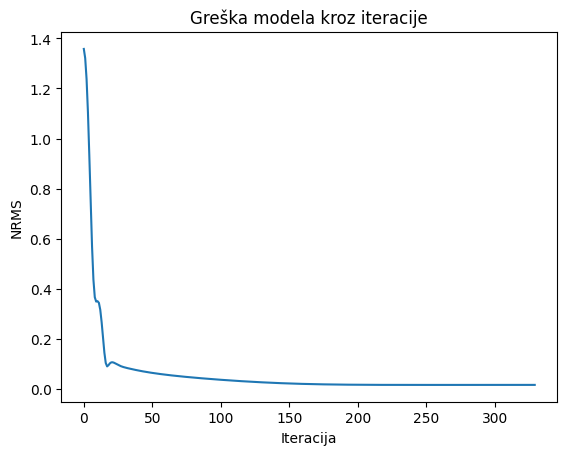

In [721]:
P1_ident_podaci.reset_values()
train(
    podaci=P1_ident_podaci,
    aktivacijska_funkcija=aktivacijska_funkcija2,
    iteracije=330,
    learning_rate=0.1,
    momentum=0.3,
)